In [3]:
# IMPORTAR Y LIMPIAR DATOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## El archivo no está separado por comas normales, sino por tabuladores (\t) por lo que agrego el argumento sep,
## además, en el dataframe existen filas rotas o mal formadas en el archivo por lo que on_bad_lines='skip' simplemente las ignora. Así no se rompe todo el proceso.
df = pd.read_csv("/content/25171.csv", sep='\t', on_bad_lines='skip')

df.head()

Total Nacional Comunidades y Ciudades Autónomas  \
0       Nacional                              NaN   
1       Nacional                              NaN   
2       Nacional                              NaN   
3       Nacional                              NaN   
4       Nacional                              NaN   

  General, vivienda nueva y de segunda mano Índices y tasas Periodo    Total  
0                                   General          Índice  2024T4  165,433  
1                                   General          Índice  2024T3  162,521  
2                                   General          Índice  2024T2  158,083  
3                                   General          Índice  2024T1  152,618  
4                                   General          Índice  2023T4   148,69

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total Nacional                             17280 non-null  object
 1   Comunidades y Ciudades Autónomas           16416 non-null  object
 2   General, vivienda nueva y de segunda mano  17280 non-null  object
 3   Índices y tasas                            17280 non-null  object
 4   Periodo                                    17280 non-null  object
 5   Total                                      16128 non-null  object
dtypes: object(6)
memory usage: 810.1+ KB


In [6]:
df.shape

(17280, 6)

In [16]:
df.isnull().sum()

Total Nacional                                  0
Comunidades y Ciudades Autónomas              864
General, vivienda nueva y de segunda mano       0
Índices y tasas                                 0
Periodo                                         0
Total                                        1152
dtype: int64

In [35]:
df = df.dropna(subset=['Comunidades y Ciudades Autónomas', 'Total'])
print(df.shape)

(15264, 6)


In [36]:
df.columns

Index(['Total Nacional', 'Comunidades y Ciudades Autónomas',
       'General, vivienda nueva y de segunda mano', 'Índices y tasas',
       'Periodo', 'Total'],
      dtype='object')

In [37]:
df.tail(15600)

Total Nacional Comunidades y Ciudades Autónomas  \
864         Nacional                     01 Andalucía   
865         Nacional                     01 Andalucía   
866         Nacional                     01 Andalucía   
867         Nacional                     01 Andalucía   
868         Nacional                     01 Andalucía   
...              ...                              ...   
16699       Nacional                       19 Melilla   
16700       Nacional                       19 Melilla   
16701       Nacional                       19 Melilla   
16702       Nacional                       19 Melilla   
16703       Nacional                       19 Melilla   

      General, vivienda nueva y de segunda mano  \
864                                     General   
865                                     General   
866                                     General   
867                                     General   
868                                     General   
...                                         ...   
16699                                   General   
16700                                   General   
16701                                   General   
16702                                   General   
16703                                   General   

                     Índices y tasas Periodo    Total  
864                           Índice  2024T4  165,457  
865                           Índice  2024T3  162,275  
866                           Índice  2024T2  156,273  
867                           Índice  2024T1   149,88  
868                           Índice  2023T4  145,927  
...                              ...     ...      ...  
16699  Variación en lo que va de año  2008T1      0,9  
16700  Variación en lo que va de año  2007T4     14,5  
16701  Variación en lo que va de año  2007T3     12,6  
16702  Variación en lo que va de año  2007T2      9,6  
16703  Variación en lo que va de año  2007T1      6,3  

[15264 rows x 6 columns]

In [38]:
df.describe()

Total Nacional Comunidades y Ciudades Autónomas  \
count           15264                            15264   
unique              1                               19   
top          Nacional                     01 Andalucía   
freq            15264                              864   

       General, vivienda nueva y de segunda mano Índices y tasas Periodo  \
count                                      15264           15264   15264   
unique                                         3               4      72   
top                                      General          Índice  2024T4   
freq                                        5472            3816     212   

        Total  
count   15264  
unique   4050  
top         1  
freq      163

In [ ]:
# Exploración de datos

In [39]:
df['Comunidades y Ciudades Autónomas'].unique()

array(['01 Andalucía', '02 Aragón', '03 Asturias, Principado de',
       '04 Balears, Illes', '05 Canarias', '06 Cantabria',
       '07 Castilla y León', '08 Castilla - La Mancha', '09 Cataluña',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

In [40]:
df['General, vivienda nueva y de segunda mano'].unique()

array(['General', 'Vivienda nueva', 'Vivienda segunda mano'], dtype=object)

In [41]:
df['Índices y tasas'].unique()

array(['Índice', 'Variación trimestral', 'Variación anual',
       'Variación en lo que va de año'], dtype=object)

In [48]:
media_comunidades = df.groupby('Comunidades y Ciudades Autónomas')['Total'].mean().reset_index()

media_comunidades = media_comunidades.sort_values(by='Total', ascending=False)

print(media_comunidades)

   Comunidades y Ciudades Autónomas     Total
17                         18 Ceuta  3.176471
15                    16 País Vasco  2.635135
11                       12 Galicia  2.623188
18                       19 Melilla  2.400000
3                 04 Balears, Illes  2.000000
0                      01 Andalucía  2.000000
8                       09 Cataluña  1.825397
4                       05 Canarias  1.649123
9           10 Comunitat Valenciana  1.105263
13             14 Murcia, Región de  0.789474
14   15 Navarra, Comunidad Foral de  0.762712
12          13 Madrid, Comunidad de  0.407895
7           08 Castilla - La Mancha  0.346667
10                   11 Extremadura -0.333333
16                     17 Rioja, La -0.350000
2        03 Asturias, Principado de -0.353846
5                      06 Cantabria -0.402985
6                07 Castilla y León -0.551724
1                         02 Aragón -0.698795


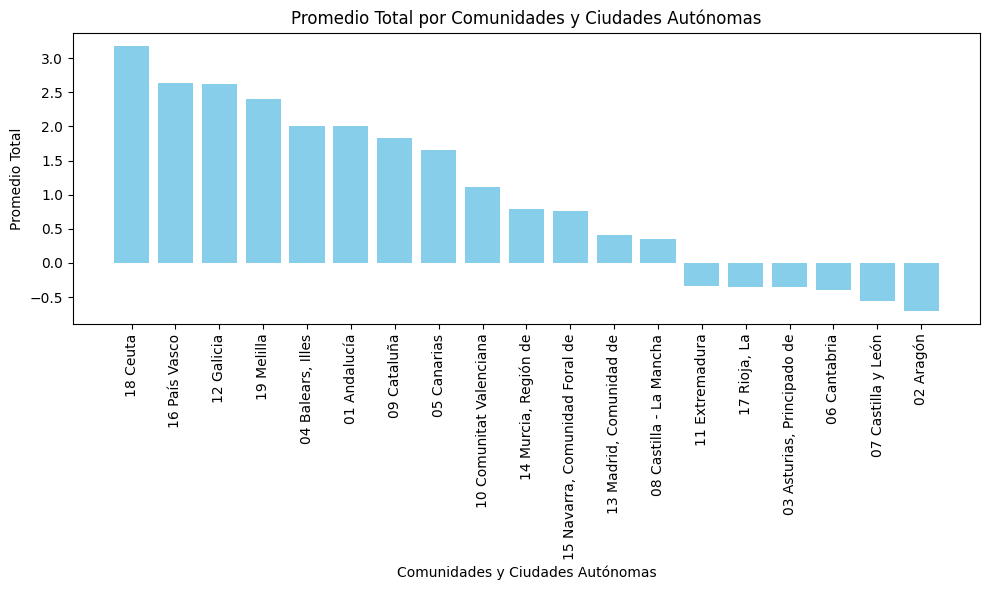

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(media_comunidades['Comunidades y Ciudades Autónomas'], media_comunidades['Total'], color='skyblue')


plt.title('Promedio Total por Comunidades y Ciudades Autónomas')
plt.xlabel('Comunidades y Ciudades Autónomas')
plt.ylabel('Promedio Total')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [50]:
# Cómo ha cambiado el precio de la vivienda trimestre a trimestre
df = df.sort_values('Periodo')

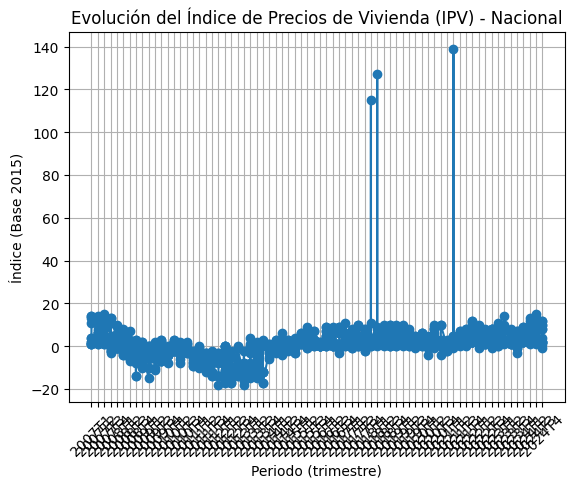

In [51]:
plt.plot(df['Periodo'], df['Total'], marker='o')
plt.title('Evolución del Índice de Precios de Vivienda (IPV) - Nacional')
plt.xlabel('Periodo (trimestre)')
plt.ylabel('Índice (Base 2015)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [54]:
# Cuánto ha subido o bajado respecto al trimestre anterior (variación trimestral)
df['Variación Trimestral (%)'] = df['Total'].pct_change() * 100
df['Variación Anual (%)'] = df['Total'].pct_change(periods=4) * 100
display(df[['Periodo', 'Total', 'Variación Trimestral (%)', 'Variación Anual (%)']])

Periodo  Total  Variación Trimestral (%)  Variación Anual (%)
6767   2007T1    1.0                       NaN                  NaN
14687  2007T1    1.0                  0.000000                  NaN
8279   2007T1   11.0               1000.000000                  NaN
3743   2007T1    2.0                -81.818182                  NaN
3599   2007T1    2.0                  0.000000                100.0
...       ...    ...                       ...                  ...
8280   2024T4   10.0                 25.000000                 25.0
9000   2024T4    2.0                -80.000000               -300.0
16488  2024T4    2.0                  0.000000                -80.0
9360   2024T4   12.0                500.000000                 50.0
936    2024T4    2.0                -83.333333                -80.0

[1209 rows x 4 columns]

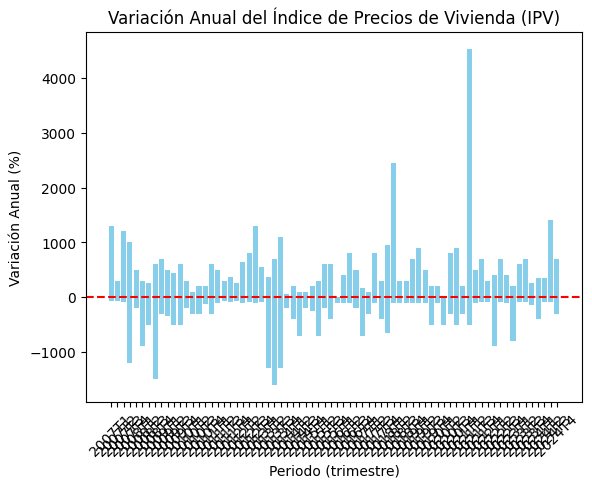

In [55]:
# Cuánto ha cambiado respecto al mismo trimestre del año anterior (variación anual)
plt.bar(df['Periodo'], df['Variación Anual (%)'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Variación Anual del Índice de Precios de Vivienda (IPV)')
plt.xlabel('Periodo (trimestre)')
plt.ylabel('Variación Anual (%)')
plt.xticks(rotation=45)
plt.show()

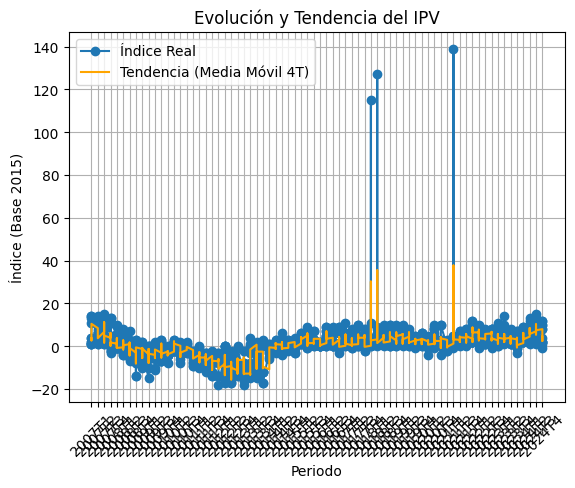

In [57]:
# Tendencia del IPV
df['Media Móvil 4T'] = df['Total'].rolling(window=4).mean()
plt.plot(df['Periodo'], df['Total'], label='Índice Real', marker='o')
plt.plot(df['Periodo'], df['Media Móvil 4T'], label='Tendencia (Media Móvil 4T)', color='orange')
plt.title('Evolución y Tendencia del IPV')
plt.xlabel('Periodo')
plt.ylabel('Índice (Base 2015)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [62]:
df_comunidades = df['Comunidades y Ciudades Autónomas']
df_comunidades = df.sort_values(['Comunidades y Ciudades Autónomas', 'Periodo'])

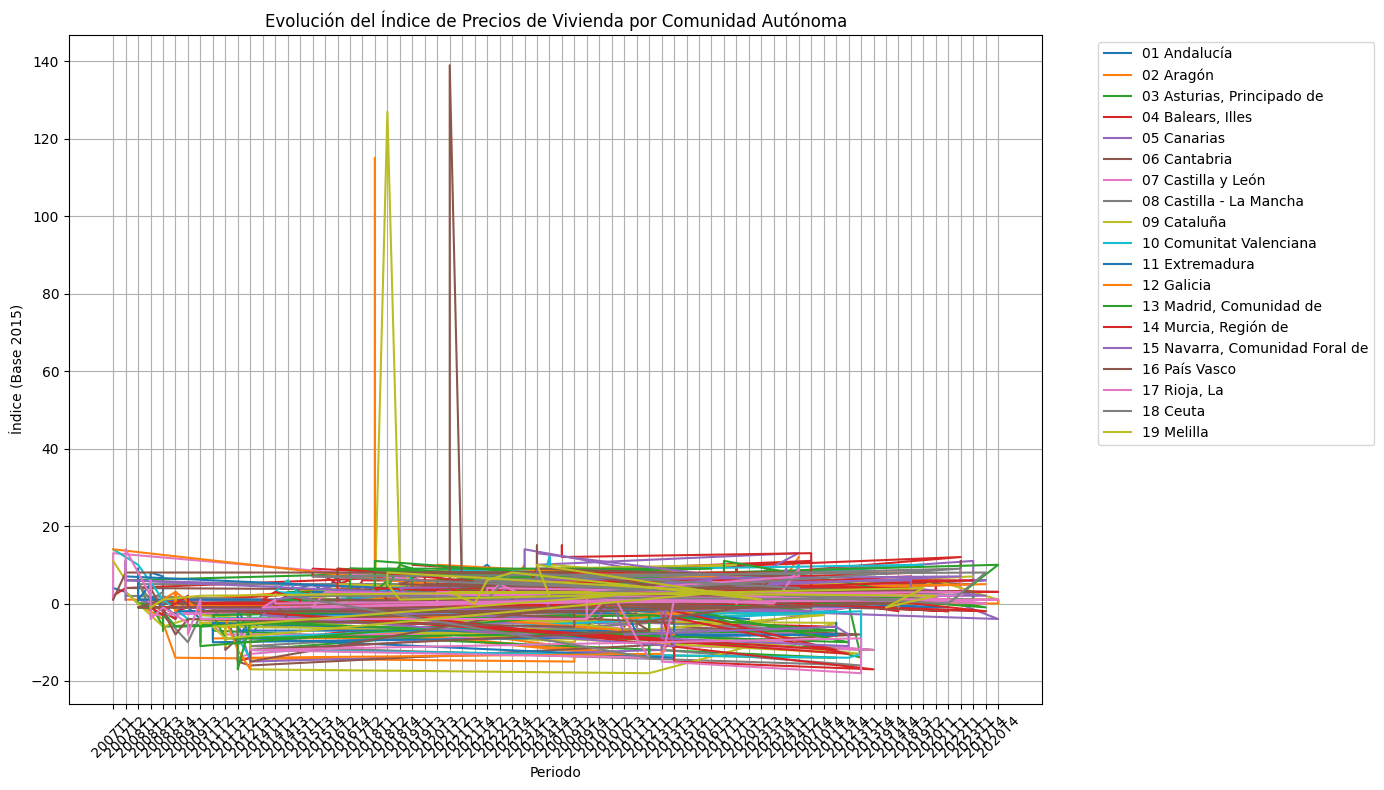

In [64]:
plt.figure(figsize=(14, 8))

for comunidad in df_comunidades['Comunidades y Ciudades Autónomas'].unique():
    datos = df_comunidades[df_comunidades['Comunidades y Ciudades Autónomas'] == comunidad]
    plt.plot(datos['Periodo'], datos['Total'], label=comunidad)

plt.title('Evolución del Índice de Precios de Vivienda por Comunidad Autónoma')
plt.xlabel('Periodo')
plt.ylabel('Índice (Base 2015)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

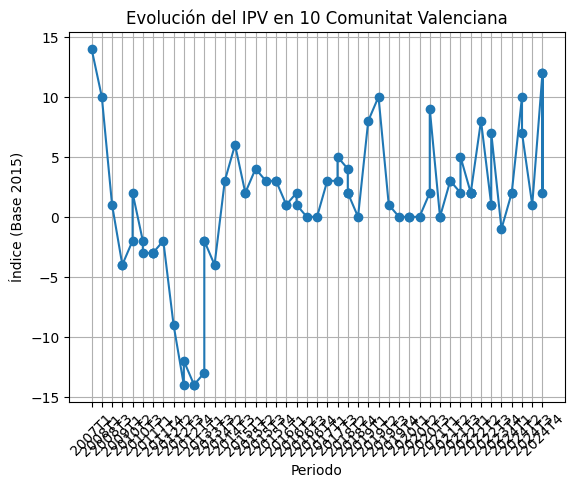

In [66]:
comunidad = '10 Comunitat Valenciana'

datos_andalucia = df_comunidades[df_comunidades['Comunidades y Ciudades Autónomas'] == comunidad]

# Gráfico
plt.plot(datos_andalucia['Periodo'], datos_andalucia['Total'], marker='o')
plt.title(f'Evolución del IPV en {comunidad}')
plt.xlabel('Periodo')
plt.ylabel('Índice (Base 2015)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Orientación a objetos